# Busca em Grade com `SVC` para intervalo $[0, 1]$ no parâmetro `gamma`

A busca utilizou apenas dados dos 6 canais previamente escolhidos.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from seaborn import scatterplot
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold

In [2]:
# Carregando intervalo de chb
file_range = [
    '01', '02', '03', '04', '05', '07', '08',
    '10', '11', '12', '13', '14', '15', '16',
    '17', '18', '19', '21', '22', '23', '24'
]

def dataframe_from_chb(chb_number:str) -> pd.DataFrame:
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

In [3]:
chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

some_6_channels = ['2', '3', '6', '7', '10', '14']

# Filtrando colunas do chb que são referentes aos canais em some_6_channels
columns_from_6_channels = [column for column in chb_df.columns if column.split('-')[-1] in some_6_channels]

chb_groups = chb_df.pop('chb').values
chb_y = chb_df.pop('target').values
chb_X = chb_df[columns_from_6_channels].values

pipe = make_pipeline(StandardScaler(), SVC(C=0.15, cache_size=500))

folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

C_grid = {'svc__gamma':np.linspace(0, 1, 11)}

In [4]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=C_grid,
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs.cv_results_).to_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-3.csv', index=False)

rank_test_score,param_svc__gamma,mean_test_score,std_test_score
3,0.000000,0.500000,0.000000
2,0.100000,0.511488,0.034674
1,0.200000,0.515265,0.033818
3,0.300000,0.500000,0.000000
3,0.400000,0.500000,0.000000
3,0.500000,0.500000,0.000000
3,0.600000,0.500000,0.000000
3,0.700000,0.500000,0.000000
3,0.800000,0.500000,0.000000
3,0.900000,0.500000,0.000000


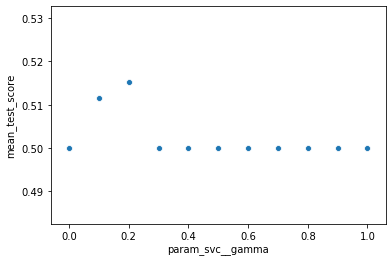

In [4]:
columns = ['rank_test_score', 'param_svc__gamma', 'mean_test_score', 'std_test_score']

cv_results_df = pd.read_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-3.csv')[columns]

scatterplot(
    data=cv_results_df,
    x='param_svc__gamma',
    y='mean_test_score'
)

cv_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()